# Random forests

A nonparametric model, a random forest is an ensemble learning method that constructs multiple decision trees (then takes the mode) when you train the model. This helps correct for decision trees' overfitting the training data.

Random forests tend to work well out of the box. They handle nonlinearity very well and work well in very high dimension spaces.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn import ensemble, metrics, model_selection, preprocessing
from utils import plot_decision

## Load and prep the data

In [2]:
# load the iris data
df = pd.read_csv('data/iris.csv')
df['species_label'], _ = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [3]:
# select features
y = df['species_label']
X = df[['petal_length', 'petal_width']]

In [4]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

## Train the model and make predictions

Note we didn't have to standardize the data to use a decision tree.

In [5]:
# train the random forest model using 10 decision trees and 2 CPU cores
rf = ensemble.RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [6]:
# use the model to make predictions with the test data
y_pred = rf.predict(X_test)

## Evaluate the model's performance

In [7]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 2
Accuracy: 0.96


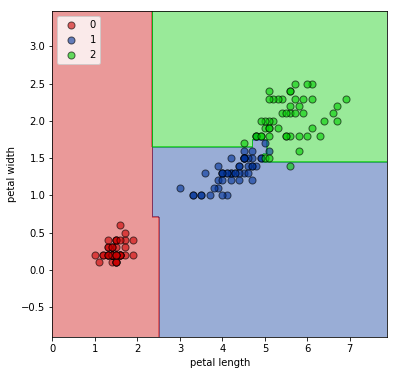

In [8]:
# visualize the model's decision regions to see how it separates the samples
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision(X=X_combined, y=y_combined, classifier=rf)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

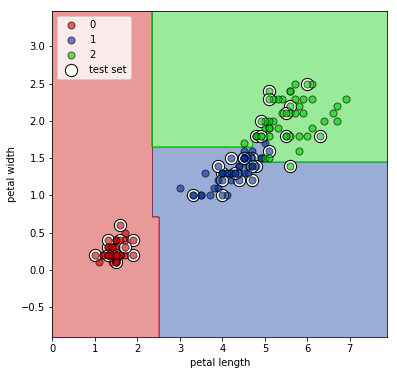

In [9]:
# same thing, but this time identify the points that constituted the test data set
test_idx = range(len(y_train), len(y_combined))
plot_decision(X=X_combined, y=y_combined, classifier=rf, test_idx=test_idx)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()